In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# 
df = pd.read_csv('ml.csv')
df.head()

,Gross_National_Income,Industry_growth_rate,Inflation_rate,Population,GDP_Per_Capita,Trade_Rate
0,2.010516e+10,-5.0,2.0,38972230.0,512.0,0.0
1,1.435263e+10,-13.0,2.0,40099462.0,356.0,0.0
2,1.454522e+10,-6.0,2.0,41128771.0,353.0,0.0
3,1.319898e+10,-2.0,2.0,42239854.0,2233.0,0.0
4,1.185274e+10,2.0,2.0,2927519.0,4114.0,1.0


In [31]:
df.dtypes

Gross_National_Income    float64
Industry_growth_rate     float64
Inflation_rate           float64
Population               float64
GDP_Per_Capita           float64
Trade_Rate               float64
dtype: object

In [32]:
# define the target variable
y = df['GDP_Per_Capita']

# define the features
X = df.drop(['GDP_Per_Capita'], axis=1)

# ouput 
print('Target variable: ', y.shape)
print('Features: ', X.shape)

Target variable:  (3244,)
Features:  (3244, 5)


In [33]:
X.head()

,Gross_National_Income,Industry_growth_rate,Inflation_rate,Population,Trade_Rate
0,2.010516e+10,-5.0,2.0,38972230.0,0.0
1,1.435263e+10,-13.0,2.0,40099462.0,0.0
2,1.454522e+10,-6.0,2.0,41128771.0,0.0
3,1.319898e+10,-2.0,2.0,42239854.0,0.0
4,1.185274e+10,2.0,2.0,2927519.0,1.0


In [34]:
y.head()

0     512.0
1     356.0
2     353.0
3    2233.0
4    4114.0
Name: GDP_Per_Capita, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve

# split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [36]:
# display the results of the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2595, 5), (649, 5), (2595,), (649,))

In [37]:
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.metrics import root_mean_squared_error, r2_score

## Linear Regression

rmse:  22833.35631849834
r_square:  0.13836869864647272


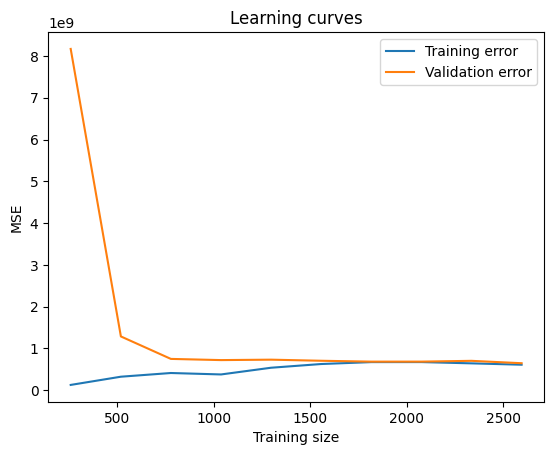

In [38]:
## Train the model 
linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)

## make precdictions
linear_pred = linear_reg.predict(X_test)

## Model Evaluation
linear_r2 = r2_score(y_test, linear_pred)
linear_rmse = root_mean_squared_error(y_test, linear_pred)

## output results
print('rmse: ', linear_rmse)
print('r_square: ', linear_r2)

## Learning curve
train_sizes, train_scores, test_scores = learning_curve(linear_reg, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.ylabel('MSE')
plt.xlabel('Training size')
plt.title('Learning curves')
plt.legend()
plt.show()

## Lasso 

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.897e+11, tolerance: 1.861e+08
  model = cd_fast.enet_coordinate_descent(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.291e+09, tolerance: 7.671e+06
  model = cd_fast.enet_coordinate_descent(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

root_mean_squared_error: 22833.299572329495
root square: 0.13837298134708553


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.095e+11, tolerance: 3.644e+07
  model = cd_fast.enet_coordinate_descent(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.276e+11, tolerance: 4.677e+07
  model = cd_fast.enet_coordinate_descent(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

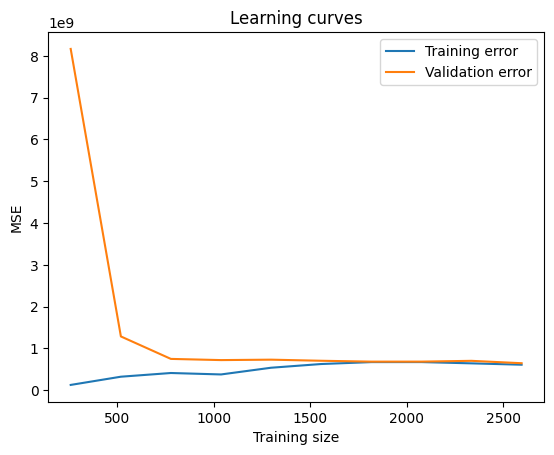

In [39]:
# Build a Lasso regression model
lasso_reg = Lasso()

# Train the model
lasso_reg.fit(X_train, y_train)

# Make predictions
lasso_pred = lasso_reg.predict(X_test)

# Evaluate the model
lasso_rmse = root_mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

# output result
print(f'root_mean_squared_error: {lasso_rmse}')
print(f'root square: {lasso_r2}')

# 
train_sizes, train_scores, test_scores = learning_curve(lasso_reg, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.ylabel('MSE')
plt.xlabel('Training size')
plt.title('Learning curves')
plt.legend()
plt.show()

## ElasticNet Model

root_mean_squared_error: 23245.096492503042
root square: 0.10701396674615216


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.476e+11, tolerance: 1.810e+08
  model = cd_fast.enet_coordinate_descent(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.411e+11, tolerance: 4.985e+07
  model = cd_fast.enet_coordinate_descent(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

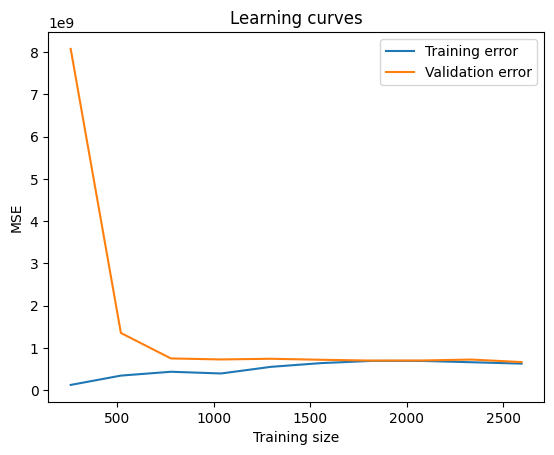

In [40]:
# Train the model 
elastic_net_reg = ElasticNet()

elastic_net_reg.fit(X_train, y_train)

# make predictions
elastic_net_pred = elastic_net_reg.predict(X_test)

# Evaluate the model
elastic_net_rmse = root_mean_squared_error(y_test, elastic_net_pred)
elastic_net_r2 = r2_score(y_test, elastic_net_pred)

# output result
print(f'root_mean_squared_error: {elastic_net_rmse}')
print(f'root square: {elastic_net_r2}')

#
train_sizes, train_scores, test_scores = learning_curve(elastic_net_reg, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.ylabel('MSE')
plt.xlabel('Training size')
plt.title('Learning curves')
plt.legend()
plt.show()

## Compare Models

In [41]:
# Create a DataFrame with the evaluation metrics
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression', 'ElasticNet Regression'],
    'Mean Squared Error': [linear_rmse, lasso_rmse, elastic_net_rmse],
    'R^2 Score': [linear_r2, lasso_r2, elastic_net_r2]
})

results

,Model,Mean Squared Error,R^2 Score
0,Linear Regression,22833.356318,0.138369
1,Lasso Regression,22833.299572,0.138373
2,ElasticNet Regression,23245.096493,0.107014
